# Data Preprocessing

In [53]:
import os
import pandas as pd
import matplotlib

ImportError: cannot import name 'set_parallel_chunksize' from 'numba.np.ufunc' (/usr/lib/python3/dist-packages/numba/np/ufunc/__init__.py)

In [10]:
nasa_battery = pd.read_csv('datasets/B0005.csv')

In [11]:
# convert date to numeric function
def convert_date_to_numeric(df, column_name):
    df[column_name] = pd.to_datetime(df[column_name])
    df[column_name] = df[column_name].astype('int64') // 1e9
    return df

In [12]:
# clean data by converting to numeric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
nasa_battery['type'] = label_encoder.fit_transform(nasa_battery['type'])
nasa_battery = nasa_battery.dropna(subset=['type'])
nasa_battery['type'] = nasa_battery['type'].astype(int)

In [13]:
# remove all columns with type 2
nasa_battery = nasa_battery[nasa_battery.type != 2]

In [14]:
# drop NA columns
nasa_battery = nasa_battery.dropna(axis=1, how='all')

In [15]:
nasa_battery

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,type,start_time,ambient_temp,Capacity
0,3.873017,-0.001201,24.655358,0.000,0.003,0.000,0,2008-04-02 13:08:17.000920,24,NaN
1,3.479394,-4.030268,24.666480,-4.036,1.570,2.532,0,2008-04-02 13:08:17.000920,24,NaN
2,4.000588,1.512731,24.675394,1.500,4.726,5.500,0,2008-04-02 13:08:17.000920,24,NaN
3,4.012395,1.509063,24.693865,1.500,4.742,8.344,0,2008-04-02 13:08:17.000920,24,NaN
4,4.019708,1.511318,24.705069,1.500,4.753,11.125,0,2008-04-02 13:08:17.000920,24,NaN
...,...,...,...,...,...,...,...,...,...,...
604797,0.236356,-0.003484,23.372048,0.000,0.003,0.000,0,2008-05-28 11:09:42.000045,24,NaN
604798,0.003365,-0.001496,23.369434,0.000,0.003,2.547,0,2008-05-28 11:09:42.000045,24,NaN
604799,4.985137,0.000506,23.386535,0.000,5.002,5.500,0,2008-05-28 11:09:42.000045,24,NaN
604800,4.984720,0.000442,23.386983,-0.002,5.002,8.312,0,2008-05-28 11:09:42.000045,24,NaN


Features:

    Voltage_measured: Battery terminal voltage (Volts)
    Current_measured: Battery output current (Amps)
    Temperature_measured: Battery temperature (degree C)
    Current_charge: Current measured at load or charge (Amps) 
    Voltage_charge: Voltage measured at load or charge (Volts)
    Time: Time vector for the cycle (secs)
    Capacity: Battery capacity (Ahr) for discharge till 2.7V


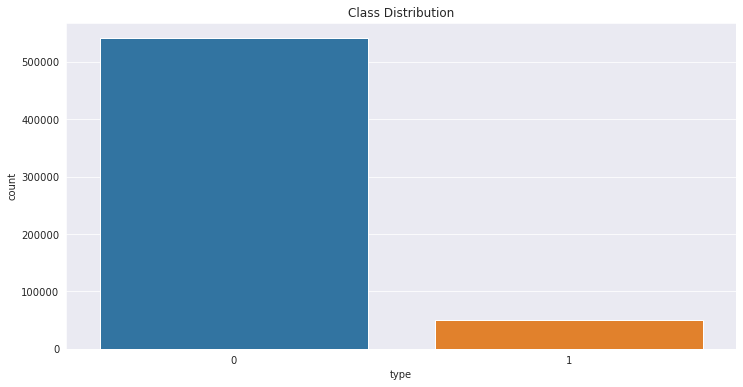

In [16]:
# plot class distributions (0 = charge, 1 = discharge)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.title("Class Distribution")
sns.countplot(x="type", data=nasa_battery)
plt.show()

In [38]:
# corr data
corr_data = nasa_battery.drop(['start_time'], axis=1)

In [39]:
# create train test split
from sklearn.model_selection import train_test_split

X = nasa_battery.drop(['type', 'start_time', ], axis=1)
y = nasa_battery['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
nasa_battery.describe()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,type,ambient_temp,Capacity
count,591458.000000,591458.000000,591458.000000,591458.000000,591458.000000,591458.000000,591458.000000,591458.0,50285.000000
mean,4.103945,0.369404,26.369701,0.634476,4.024930,4763.856934,0.085019,24.0,1.560345
std,0.213469,0.907558,2.772424,0.737029,1.208825,3147.859026,0.278910,0.0,0.182380
min,0.003365,-4.479660,23.214802,-4.468000,0.000000,0.000000,0.000000,24.0,1.287453
25%,4.089426,0.040636,24.488485,0.057000,4.240000,1928.175750,0.000000,24.0,1.386229
50%,4.205140,0.171961,25.479630,0.261000,4.305000,4467.515500,0.000000,24.0,1.538237
75%,4.205908,1.259778,27.348768,1.498000,4.656000,7503.824000,0.000000,24.0,1.746871
max,8.393141,1.531301,41.450232,1.998400,5.002000,10807.328000,1.000000,24.0,1.856487


In [20]:
# check types
X_train.dtypes

Voltage_measured        float64
Current_measured        float64
Temperature_measured    float64
Current_charge          float64
Voltage_charge          float64
Time                    float64
ambient_temp              int64
dtype: object

In [40]:
# check for missing values
X_train.isnull().sum()

# convert non-numeric columns to numeric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in X_train.columns:
    if X_train[column].dtype == type(object):
        X_train[column] = label_encoder.fit_transform(X_train[column])
        X_test[column] = label_encoder.transform(X_test[column])


# impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

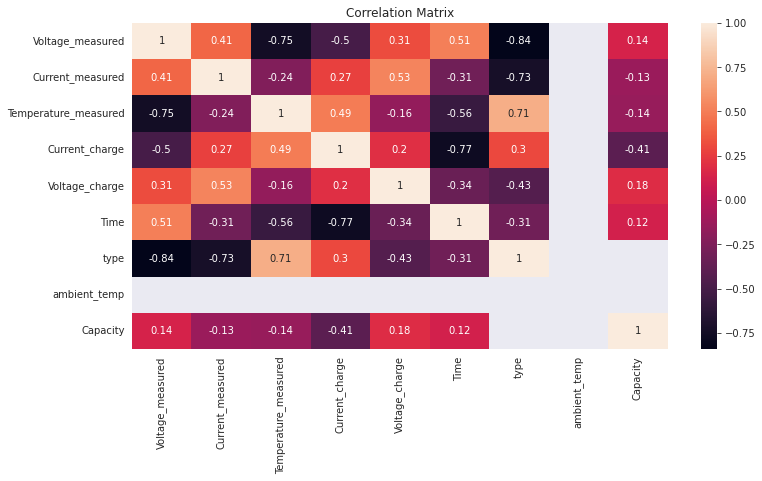

In [41]:
# plot correlation matrix of training data
test = pd.DataFrame(corr_data)
test.corr()
plt.figure(figsize=(12, 6))
plt.title("Correlation Matrix")
# use column names as labels
test.columns = corr_data.columns
sns.heatmap(test.corr(), annot=True)
plt.show()

Physical background (https://github.com/VaibhavBhujade/RUL-of-Lithium-Ion-Battery/tree/main):

- increasing capacity with increasing temperature
  (K. Amine, J. Liu and I. Belharouak, " High-temperature storage and cycling of C-LiFePO 4 /graphite Li-ion cells ", Electrochem. Commun., vol. 7, pp. 669-673, Jul. 2005.)


- higher discharge -> lower capacity 
  (J. Zhu, T. Tan, L. Wu and H. Yuan, "RUL Prediction of Lithium-Ion Battery Based on Improved DGWO-ELM Method in a Random Discharge Rates Environment," in IEEE Access, vol. 7, pp. 125176-125187, 2019, doi: 10.1109/ACCESS.2019.2936822. keywords: {Prediction algorithms;Discharges (electric);Lithium-ion batteries;Support vector machines;Employee welfare;Optimization;Lithium-ion batteries;RUL;random discharge;DGWO;DE;ELM}, )

Text(0, 0.5, 'capacity')

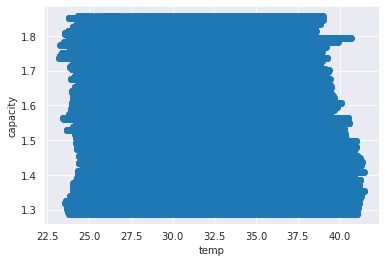

In [43]:
matplotlib.pyplot.scatter(corr_data["Temperature_measured"], corr_data["Capacity"])
matplotlib.pyplot.xlabel("temp")
matplotlib.pyplot.ylabel("capacity")
# though, plotted here, there seems to be no correlation between?


Text(0, 0.5, 'charge')

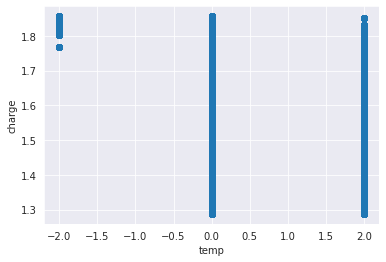

In [47]:
matplotlib.pyplot.scatter(corr_data["Current_charge"], corr_data["Capacity"])
matplotlib.pyplot.xlabel("temp")
matplotlib.pyplot.ylabel("capacity")
# though, there seems to be no correlation between?


Text(0, 0.5, 'voltage')

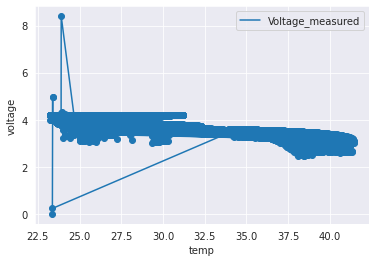

In [35]:
matplotlib.pyplot.scatter(corr_data["Temperature_measured"], corr_data["Voltage_measured"])
matplotlib.pyplot.xlabel("temp")
matplotlib.pyplot.ylabel("voltage")
#higher temp -> lower voltage --> is it because the chemical reaction is slower?

Text(0, 0.5, 'current')

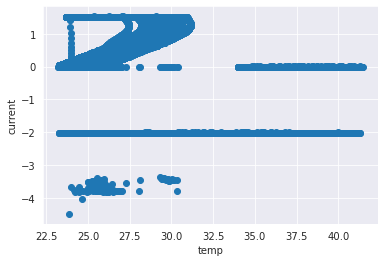

In [36]:
matplotlib.pyplot.scatter(corr_data["Temperature_measured"], corr_data["Current_measured"])
matplotlib.pyplot.xlabel("temp")
matplotlib.pyplot.ylabel("current")


# Random Forest

In [23]:
# train model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [24]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    108221
           1       1.00      1.00      1.00     10071

    accuracy                           1.00    118292
   macro avg       1.00      1.00      1.00    118292
weighted avg       1.00      1.00      1.00    118292



<AxesSubplot:>

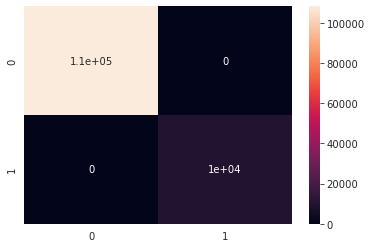

In [25]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True)

### Interpretation of the data and the classfier

In [55]:
# check feature importance using SHAP
import numpy as np
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# plot feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

ImportError: cannot import name 'set_parallel_chunksize' from 'numba.np.ufunc' (/usr/lib/python3/dist-packages/numba/np/ufunc/__init__.py)

In [58]:
# use PCA to reduce dimensionality and plot
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

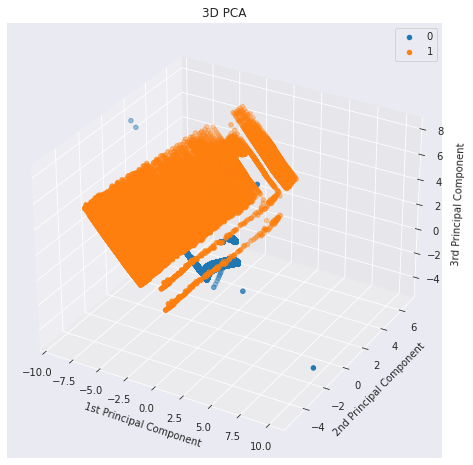

In [59]:
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
ax = plt.subplot(111, projection='3d')  # Create a 3D subplot

# Plot the PCA
# Assuming you have a 'y_train' array for labels to color the points
# If you don't have labels, you can just use one color for all points
for label in np.unique(y_train):
    ax.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 2], X_train_pca[y_train == label, 1], label=label)

plt.title("3D PCA")
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
ax.set_zlabel("3rd Principal Component")
plt.legend()
plt.show()

# KNN Classifier

### Testing the KNN classifier as sanity check

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Instantiate learning model (k = 1)
classifier = KNeighborsClassifier(n_neighbors = 1, p = 1, weights = 'uniform')
# n_neighbors = number of neighbors to use (K)
# p = Power parameter for the Minkowski metric. 
#     When p = 1, this is equivalent to using manhattan_distance (l1), 
#     and euclidean_distance (l2) for p = 2. 
# weights = weight function used in prediction
#     When = ‘uniform’: All points in each neighborhood are weighted equally.
#     When = ‘distance’: weight points by the inverse of their distance. 
#                        in this case, closer neighbors of a query point will have a greater 
#                        influence than neighbors which are further away.

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


# Additional: SVM Classifier

## Linear Kernel

In [ ]:
# create the model (SVM with linear kernel)
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# fit and test the model
model = LinearSVC(random_state=0, tol=1e-5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
Liblinear failed to converge, increase the number of iterations.


0.9993152537787847

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    108221
           1       1.00      0.99      1.00     10071

    accuracy                           1.00    118292
   macro avg       1.00      1.00      1.00    118292
weighted avg       1.00      1.00      1.00    118292



<Axes: >

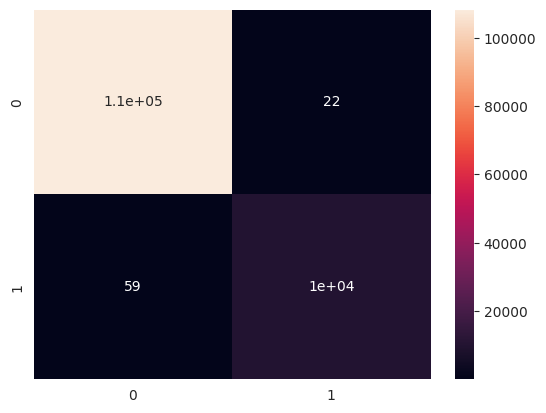

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True)

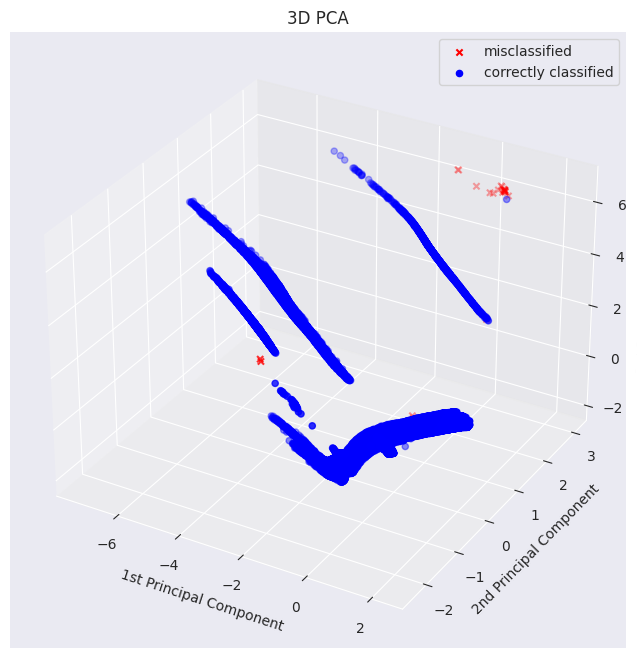

In [ ]:
# PCA to reduce dimensionality and plot misclassified vs correctly classified samples
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# get indices of misclassified samples
misclassified_idx = np.where(y_test != y_pred)[0]
correctly_classified_idx = np.where(y_test == y_pred)[0]

plt.figure(figsize=(12, 8))  # Adjust figure size if needed
ax = plt.subplot(111, projection='3d')  # Create a 3D subplot

# Plot the PCA
# Assuming you have a 'y_train' array for labels to color the points
# If you don't have labels, you can just use one color for all points
# for label in np.unique(y_train):
#     ax.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 2], X_train_pca[y_train == label, 1], label=label)
    
# plot misclassified samples vs correctly classified samples
ax.scatter(X_test_pca[misclassified_idx, 0], X_test_pca[misclassified_idx, 2], X_test_pca[misclassified_idx, 1], c='red', marker='x', label='misclassified')

ax.scatter(X_test_pca[correctly_classified_idx, 0], X_test_pca[correctly_classified_idx, 2], X_test_pca[correctly_classified_idx, 1], c='blue', marker='o', label='correctly classified')

plt.title("3D PCA")
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
ax.set_zlabel("3rd Principal Component")
plt.legend()
plt.show()

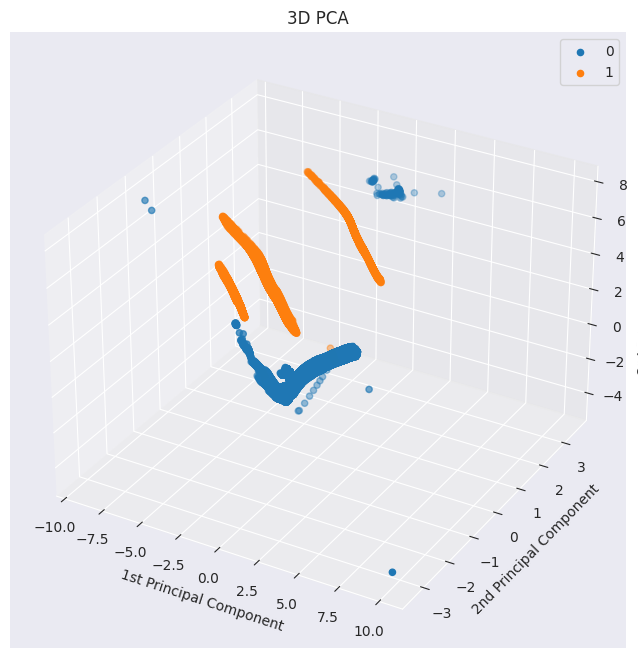

In [ ]:
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
ax = plt.subplot(111, projection='3d')  # Create a 3D subplot

# Plot the PCA
# Assuming you have a 'y_train' array for labels to color the points
# If you don't have labels, you can just use one color for all points
for label in np.unique(y_train):
    ax.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 2], X_train_pca[y_train == label, 1], label=label)
    
plt.title("3D PCA")
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
ax.set_zlabel("3rd Principal Component")
plt.legend()
plt.show()

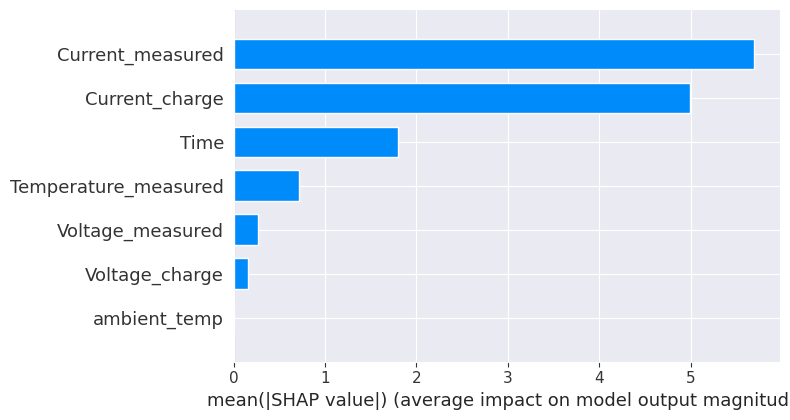

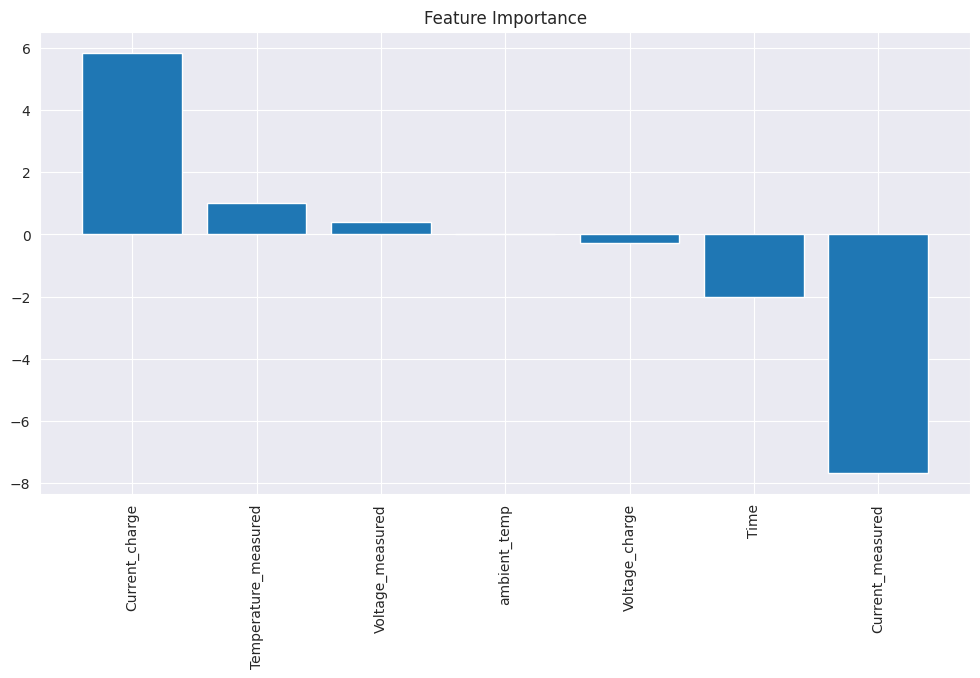

In [ ]:
# use SHAP to explain model predictions
import shap
import numpy as np
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=X.columns)

# plot feature importance
importances = model.coef_[0]
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=90)
plt.show()

## RBF Kernel

In [ ]:
# create the model (SVM with RBF kernel)
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# fit and test the model
model = SVC(kernel='rbf', gamma=0.1, C=1.0, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9996703073749704

In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    108221
           1       1.00      1.00      1.00     10071

    accuracy                           1.00    118292
   macro avg       1.00      1.00      1.00    118292
weighted avg       1.00      1.00      1.00    118292



<Axes: >

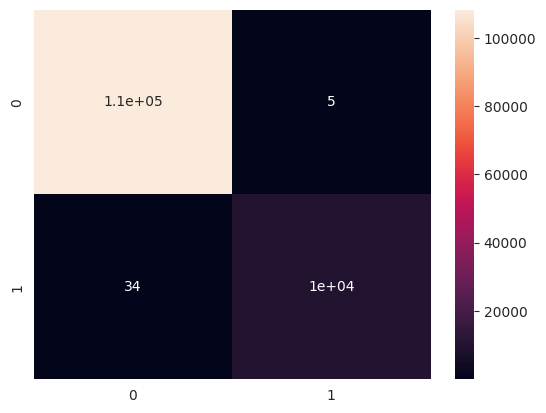

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
import seaborn as sns
sns.heatmap(cm, annot=True)

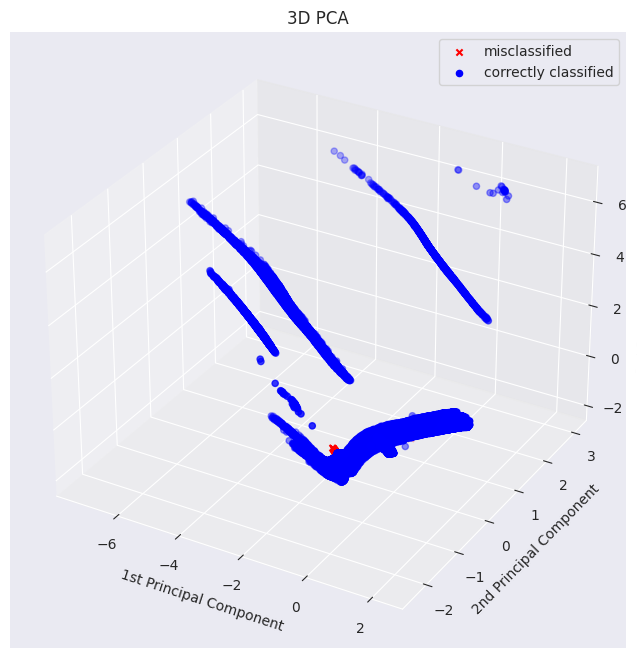

In [ ]:
# PCA to reduce dimensionality and plot misclassified vs correctly classified samples
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=3)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# get indices of misclassified samples
misclassified_idx = np.where(y_test != y_pred)[0]
correctly_classified_idx = np.where(y_test == y_pred)[0]

plt.figure(figsize=(12, 8))  # Adjust figure size if needed
ax = plt.subplot(111, projection='3d')  # Create a 3D subplot

# Plot the PCA
# Assuming you have a 'y_train' array for labels to color the points
# If you don't have labels, you can just use one color for all points
# for label in np.unique(y_train):
#     ax.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 2], X_train_pca[y_train == label, 1], label=label)
    
# plot misclassified samples vs correctly classified samples
ax.scatter(X_test_pca[misclassified_idx, 0], X_test_pca[misclassified_idx, 2], X_test_pca[misclassified_idx, 1], c='red', marker='x', label='misclassified')

ax.scatter(X_test_pca[correctly_classified_idx, 0], X_test_pca[correctly_classified_idx, 2], X_test_pca[correctly_classified_idx, 1], c='blue', marker='o', label='correctly classified')

plt.title("3D PCA")
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
ax.set_zlabel("3rd Principal Component")
plt.legend()
plt.show()

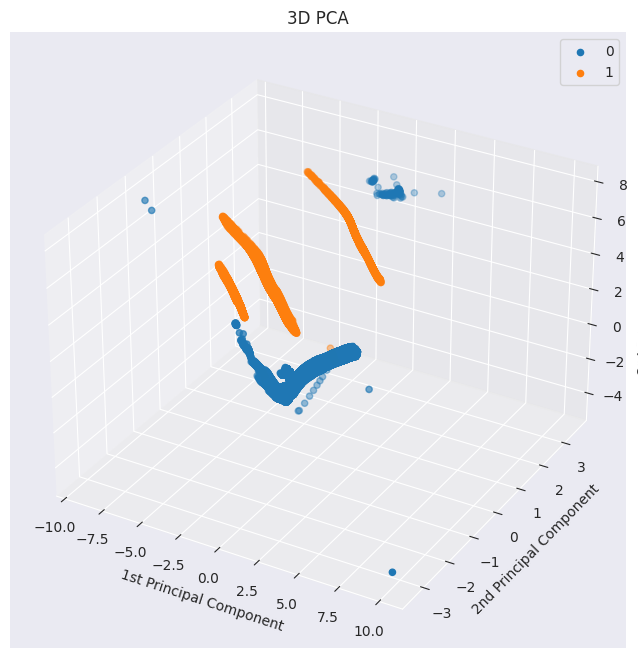

In [ ]:
plt.figure(figsize=(12, 8))  # Adjust figure size if needed
ax = plt.subplot(111, projection='3d')  # Create a 3D subplot

# Plot the PCA
# Assuming you have a 'y_train' array for labels to color the points
# If you don't have labels, you can just use one color for all points
for label in np.unique(y_train):
    ax.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 2], X_train_pca[y_train == label, 1], label=label)
    
plt.title("3D PCA")
ax.set_xlabel("1st Principal Component")
ax.set_ylabel("2nd Principal Component")
ax.set_zlabel("3rd Principal Component")
plt.legend()
plt.show()

Using 473166 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


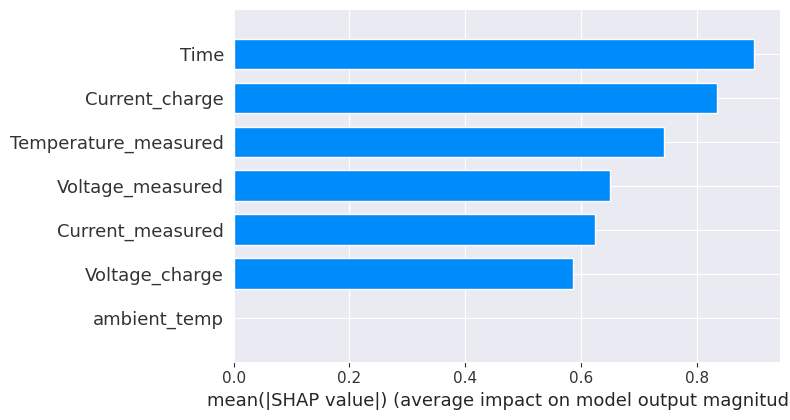

In [ ]:
# use SHAP to explain model predictions
import shap
import numpy as np
explainer = shap.KernelExplainer(model.predict, X_train)
# use shap.sample
shap_values = shap.sample(X_train, 100)
shap.summary_plot(shap_values, X_train, plot_type="bar", feature_names=X.columns)